<a href="https://colab.research.google.com/github/avanikathriya24/virtual-try-on/blob/main/acgpn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/levindabhi/ACGPN.git
%cd ACGPN

Cloning into 'ACGPN'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 161 (delta 20), reused 18 (delta 18), pack-reused 139 (from 1)
Receiving objects: 100% (161/161), 302.85 KiB | 1.13 MiB/s, done.
Resolving deltas: 100% (59/59), done.
/content/ACGPN


In [2]:
!pip install ninja

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 9.5 MB/s eta 0:00:00


In [3]:
import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys

from predict_pose import generate_pose_keypoints

In [4]:
'''
gdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)
%cd Data_preprocessing
!unzip data
%cd ..
'''

"\ngdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)\n%cd Data_preprocessing\n!unzip data\n%cd ..\n"

In [5]:
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

In [6]:
%cd pose
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

/content/ACGPN/pose
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko

but Gdown can't. Please check connections and permissions.
/content/ACGPN


In [7]:
!git clone https://github.com/levindabhi/Self-Correction-Human-Parsing-for-ACGPN.git
!git clone https://github.com/levindabhi/U-2-Net.git

Cloning into 'Self-Correction-Human-Parsing-for-ACGPN'...
remote: Enumerating objects: 769, done.
remote: Counting objects: 100% (203/203), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 769 (delta 103), reused 94 (delta 94), pack-reused 566 (from 1)
Receiving objects: 100% (769/769), 3.89 MiB | 7.52 MiB/s, done.
Resolving deltas: 100% (184/184), done.
Cloning into 'U-2-Net'...
remote: Enumerating objects: 822, done.
remote: Counting objects: 100% (334/334), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 822 (delta 312), reused 299 (delta 299), pack-reused 488 (from 1)
Receiving objects: 100% (822/822), 30.71 MiB | 20.82 MiB/s, done.
Resolving deltas: 100% (391/391), done.


In [8]:
#for segmentation mask generation
url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
output = 'lip_final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
From (redirected): https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH&confirm=t&uuid=968a2503-d948-4588-a836-298b7f5abed5
To: /content/ACGPN/lip_final.pth
100%|██████████| 267M/267M [00:02<00:00, 97.9MB/s]


'lip_final.pth'

In [9]:
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..

/content/ACGPN/U-2-Net
mkdir: cannot create directory ‘saved_models’: File exists
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/ACGPN/U-2-Net/saved_models/u2netp/u2netp.pth
100% 4.68M/4.68M [00:00<00:00, 32.8MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
From (redirected): https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ&confirm=t&uuid=c18c8f53-2b06-42eb-ae08-3d424e5c4b23
To: /content/ACGPN/U-2-Net/saved_models/u2net/u2net.pth
10

In [10]:
!mkdir checkpoints
gdown.download('https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx',output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
%cd checkpoints
!unzip ACGPN_checkpoints
%cd ..

Downloading...
From (original): https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx
From (redirected): https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx&confirm=t&uuid=10bc64cf-5fc2-4f45-bc5a-946fbe18cc29
To: /content/ACGPN/checkpoints/ACGPN_checkpoints.zip
100%|██████████| 524M/524M [00:03<00:00, 136MB/s]


/content/ACGPN/checkpoints
Archive:  ACGPN_checkpoints.zip
   creating: label2city/
  inflating: label2city/latest_net_G.pth  
  inflating: label2city/latest_net_G1.pth  
  inflating: label2city/latest_net_G2.pth  
  inflating: label2city/latest_net_U.pth  
  inflating: label2city/opt.txt      
/content/ACGPN


In [11]:
import os
os.environ["TORCH_CUDA_ARCH_LIST"] = "7.5"# Adjust based on your GPU

In [40]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/cloth


Saving 0tshirt.jpg to 0tshirt (1).jpg
/content/ACGPN/inputs
/content/ACGPN


In [41]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/img


Saving 00person.jpg to 00person.jpg
/content/ACGPN/inputs
/content/ACGPN


Most recently uploaded file: inputs/cloth/11791_00.jpg


In [42]:
(os.listdir('inputs/img'))

['0person.jpg', '00person.jpg', 'person.png']

In [43]:
(os.listdir('inputs/cloth'))

['0tshirt (1).jpg', '0tshirt.jpg', 'tshirt.jpg', 'tshirt (1).jpg']

In [44]:
import os
import glob

# Define the folder path
folder_path = "inputs/cloth"

# Get the most recently uploaded file
latest_file_cloth = max(glob.glob(os.path.join(folder_path, "*")), key=os.path.getmtime)

print("Most recently uploaded file:", latest_file_cloth)

Most recently uploaded file: inputs/cloth/0tshirt (1).jpg


In [45]:
cloth_name = '000001_1.png'
cloth_path = os.path.join('', latest_file_cloth)
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

Generating mask for: 000001_1.png
Saving output at Data_preprocessing/test_edge/000001_1.png


In [46]:
import os
import glob

# Define the folder path
folder_path = "inputs/img"

# Get the most recently uploaded file
latest_file_img = max(glob.glob(os.path.join(folder_path, "*")), key=os.path.getmtime)

print("Most recently uploaded file:", latest_file_img)

Most recently uploaded file: inputs/img/00person.jpg


In [47]:
#add pose caffemodel into pose folder

In [48]:
import time

start_time = time.time()
img_name = '000001_0.png'
img_path = os.path.join('', latest_file_img)
print(img_path)
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))

!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time))

inputs/img/00person.jpg
Resized image in 0.0190737247467041s
/content/ACGPN/Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experiment

In [49]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_0.png 000001_1.png')

In [50]:
!python test.py

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/tes

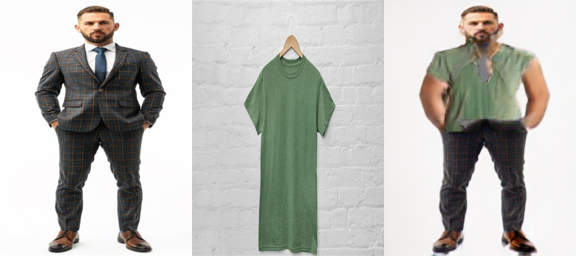

In [51]:
output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_0.png')),
                np.array(Image.open('Data_preprocessing/test_color/000001_1.png')),
                np.array(Image.open('results/test/try-on/000001_0.png'))], axis=1)
image_grid = Image.fromarray(output_grid)
image_grid

In [52]:

### Check results in 'results' folder!

In [ ]:
#**Deleting all images**

In [ ]:
!rm -rf Data_preprocessing/test_color/*
!rm -rf Data_preprocessing/test_colormask/*
!rm -rf Data_preprocessing/test_edge/*
!rm -rf Data_preprocessing/test_img/*
!rm -rf Data_preprocessing/test_label/*
!rm -rf Data_preprocessing/test_mask/*
!rm -rf Data_preprocessing/test_pose/*
!rm -rf inputs/cloth/*
!rm -rf inputs/img/*

In [ ]:
!rm -rf results/*

In [ ]:
%cd /content/

In [ ]:
!git clone https://github.com/levindabhi/SieveNet.git
%cd SieveNet

In [ ]:
!mkdir checkpoints
%cd checkpoints

!mkdir GMM
%cd GMM
!gdown --id 1zuL44-GpiXJqADjuKZWrKJzD1UNiwn5r
%cd ..

!mkdir SEG
%cd SEG
!gdown --id 1VtQHs2ynCZYFYre7JsF-TCObUv4X0dON
%cd ..

!mkdir TOM
%cd TOM
!gdown --id 1Er5bnFXu6zbSbRhniywcIZdbY2ceCMIp
%cd ..

%cd ..

In [ ]:
%cd pose/
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

In [ ]:
%%writefile config.py
import os.path as osp
import os


class parser:
    def __init__(self):
        self.dataroot = 'dataset'
        self.datamode = 'test'                                   #train, test
        self.stage = 'TOM'                                        #GMM, SEG, TOM
        self.runmode = self.datamode
        self.name = self.stage
        if self.datamode == 'train':
            self.data_list = 'train_pairs.txt'
        elif self.datamode == 'test':
            self.data_list = 'test_pairs.txt'
        self.fine_width = 192
        self.fine_height = 256
        self.radius = 4
        self.grid_path =  osp.join(self.dataroot, 'grid.png')
        if self.datamode == 'train':                            #for training keep true, for test keep false
            self.shuffle = True
        else:
            self.shuffle = False
        self.batch_size = 16
        self.workers = 1
        self.grid_size = 5

        self.lr = 0.002
        self.keep_step = 8000
        self.decay_step = 5500
        self.previous_step = 0                                  #if you want to resume training from some steps
                                                                #set previous_step in as per last updated checkpoints
        self.save_count = 200
        self.display_count = 50

        self.tensorboard_dir = osp.join(os.getcwd(), 'tensorboard')
        self.checkpoint_dir = osp.join(os.getcwd(), 'checkpoints')
        self.save_dir = osp.join(os.getcwd(), 'outputs')         #for saving output while infernce
        if not osp.exists(self.save_dir):
            os.makedirs(self.save_dir)
        if self.previous_step == 0:
            self.checkpoint = ''
        else:
            self.checkpoint = osp.join(self.checkpoint_dir, self.name, 'step_%06d.pth' % (self.previous_step))

        #Set your images path here
        self.input_image_path = 'custom/input/019579_0.jpg'
        self.input_image_path = '/content/SieveNet/000006_0.jpg'
        self.cloth_image_path = 'custom/input/017575_1.jpg'
        self.cloth_image_path = '/content/SieveNet/000530_1.jpg'

        self.human_parsing_image_path = '/content/SieveNet/000006_0.png'

In [ ]:
!python inference.py